# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

In [10]:
import pandas as pd
from datetime import datetime, timedelta
end_time = datetime.utcnow().replace(second=0, minute=30,microsecond=0)
start_time = end_time - timedelta(seconds=900.0)
datetimes = pd.date_range(start=start_time, end=end_time, freq="1S", closed='left')
datetimes

DatetimeIndex(['2020-12-03 09:15:00', '2020-12-03 09:15:01',
               '2020-12-03 09:15:02', '2020-12-03 09:15:03',
               '2020-12-03 09:15:04', '2020-12-03 09:15:05',
               '2020-12-03 09:15:06', '2020-12-03 09:15:07',
               '2020-12-03 09:15:08', '2020-12-03 09:15:09',
               ...
               '2020-12-03 09:29:50', '2020-12-03 09:29:51',
               '2020-12-03 09:29:52', '2020-12-03 09:29:53',
               '2020-12-03 09:29:54', '2020-12-03 09:29:55',
               '2020-12-03 09:29:56', '2020-12-03 09:29:57',
               '2020-12-03 09:29:58', '2020-12-03 09:29:59'],
              dtype='datetime64[ns]', length=900, freq='S')

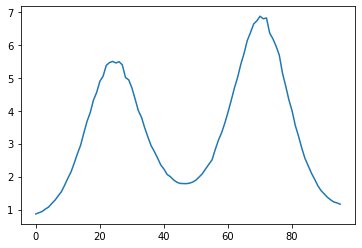

In [34]:
import numpy as np
T=96
np.repeat(45, T).reshape(T, 1)
t = np.linspace(1, T, num=T).reshape(T,1)
plt.plot(2*np.exp(-0.6*np.cos((t+40)*np.pi/T) - \
             0.7*np.cos(t*4*np.pi/T)+0.01*np.random.randn(T, 1)))

## Setup

In [5]:
# Standard python packages
import os
import sys

# Other package imports
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt

Setup some global settings and configuration

In [7]:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')

This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [9]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, src_folder)

from fcrn_bidding import examplemodule

ModuleNotFoundError: No module named 'fcrn_bidding'

## Some Processing

In [6]:
# Use our package
examplemodule.hello_world()

NameError: name 'examplemodule' is not defined

## Appendix 1 - Environment Configuration

In [5]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

D:\Development\DataScience\Projects\DataScienceTemplate\notebooks\eda
3.6.4 |Anaconda custom (64-bit)| (default, Mar 12 2018, 20:20:50) [MSC v.1900 64 bit (AMD64)]
C:\Applications\Miniconda3\envs\anaconda\python.exe
['D:\\Development\\DataScience\\Projects\\DataScienceTemplate\\src', '', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\python36.zip', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\DLLs', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\lib', 'C:\\Applications\\Miniconda3\\envs\\anaconda', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\lib\\site-packages', 'd:\\development\\datascience\\projects\\data-science-shared\\python', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\lib\\site-packages\\xgboost-0.7-py3.6.egg', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\lib\\site-packages\\win32', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\lib\\site-packages\\win32\\lib', 'C:\\Applications\\Miniconda3\\envs\\anaconda\\lib\\site-packages\\Pythonwin', 'C:\\Applications\\Miniconda3\

## Appendix 2 - Automated Tests

In [6]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts =============================
platform win32 -- Python 3.6.4, pytest-3.4.2, py-1.5.2, pluggy-0.6.0
rootdir: D:\Development\DataScience\Projects\DataScienceTemplate, inifile:
plugins: remotedata-0.2.0, openfiles-0.2.0, doctestplus-0.1.2, cov-2.5.1, arraydiff-0.2
collected 5 items

tests\examplepackage\examplemodule\test_add_value_to_numpy.py ...        [ 60%]
tests\examplepackage\examplemodule\test_hello_world.py ..                [100%]

========================== 5 passed in 0.37 seconds ===========================


In [12]:
import datetime
tm = datetime.datetime.now()
discard = datetime.timedelta(minutes=tm.minute % 15,
                             seconds=tm.second,
                             microseconds=tm.microsecond)
tm -= discard
if discard >= datetime.timedelta(minutes=15/2.):
    tm += datetime.timedelta(minutes=15)
print(tm)

2020-12-03 14:45:00


In [13]:
def round_time(minutes=15):
    tm = datetime.datetime.now()
    discard = datetime.timedelta(minutes=tm.minute % minutes,
                                 seconds=tm.second,
                                 microseconds=tm.microsecond)
    tm -= discard
    if discard >= datetime.timedelta(minutes=minutes/2.):
        tm += datetime.timedelta(minutes=minutes)
    return tm 

In [19]:
print(round_time())

2020-12-03 15:00:00


In [217]:
st = datetime.utcnow().replace(second=0, microsecond=0)
start_time = pd.Series(st).dt.round(f"15min").at[0]
start_time

Timestamp('2020-11-30 10:00:00')

In [206]:
import datetime
def round_time(dt=None, round_to=60):
    if dt == None: 
        dt = datetime.datetime.now()
    seconds = (dt - dt.min).seconds
    rounding = (seconds+round_to/2) // round_to * round_to
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

print(round_time(round_to=60))

2020-11-30 11:31:00


In [212]:
from datetime import datetime, timedelta
import pandas as pd
end_time = datetime.utcnow().replace(hour=22, minute=45, second=0, microsecond=0)
start_time = datetime.utcnow().replace(second=0, microsecond=0)
pd.date_range(start=tm, end=end_time, freq='15T').round('15min', ambiguous='infer')

DatetimeIndex(['2020-11-30 11:30:00', '2020-11-30 11:45:00',
               '2020-11-30 12:00:00', '2020-11-30 12:15:00',
               '2020-11-30 12:30:00', '2020-11-30 12:45:00',
               '2020-11-30 13:00:00', '2020-11-30 13:15:00',
               '2020-11-30 13:30:00', '2020-11-30 13:45:00',
               '2020-11-30 14:00:00', '2020-11-30 14:15:00',
               '2020-11-30 14:30:00', '2020-11-30 14:45:00',
               '2020-11-30 15:00:00', '2020-11-30 15:15:00',
               '2020-11-30 15:30:00', '2020-11-30 15:45:00',
               '2020-11-30 16:00:00', '2020-11-30 16:15:00',
               '2020-11-30 16:30:00', '2020-11-30 16:45:00',
               '2020-11-30 17:00:00', '2020-11-30 17:15:00',
               '2020-11-30 17:30:00', '2020-11-30 17:45:00',
               '2020-11-30 18:00:00', '2020-11-30 18:15:00',
               '2020-11-30 18:30:00', '2020-11-30 18:45:00',
               '2020-11-30 19:00:00', '2020-11-30 19:15:00',
               '2020-11-

In [169]:
pd.date_range(start=start_time, end=end_time, freq='60T').round('60min')

DatetimeIndex(['2020-11-26 14:00:00', '2020-11-26 15:00:00',
               '2020-11-26 16:00:00', '2020-11-26 17:00:00',
               '2020-11-26 18:00:00', '2020-11-26 19:00:00',
               '2020-11-26 20:00:00', '2020-11-26 21:00:00',
               '2020-11-26 22:00:00'],
              dtype='datetime64[ns]', freq=None)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1]
 [1]
 [1]]


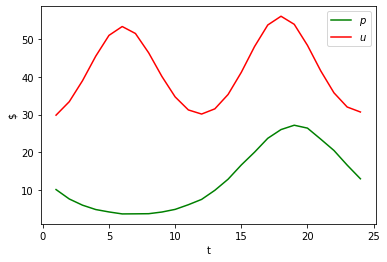

In [26]:
import numpy as np
#import cvxpy as cp

print(np.zeros((23,1)).transpose())
print(np.repeat(1, 3).reshape(3,1))


# Here we plot the demands u and prices p.
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
T = 24
t = np.linspace(1, T, num=T).reshape(T,1)
p = 10*np.exp(-np.cos((t-7)*2*np.pi/T)+0.01*np.random.randn(T,1))
u = 40*np.exp(0.3*np.cos((t+16)*np.pi/T)-0.3*np.cos((t+15)*np.pi/T) - \
    0.3*np.cos(t*4*np.pi/T))#+0.01*np.random.randn(T,1))
p = p
u = u

plt.figure(1)
plt.plot(t, p, 'g', label=r"$p$");
plt.plot(t, u, 'r', label=r"$u$");
plt.ylabel("$")
plt.xlabel("t")
plt.legend()
plt.show()


In [12]:
u

array([[29.85771915],
       [33.42739751],
       [38.9783158 ],
       [45.47113982],
       [50.97477164],
       [53.3175511 ],
       [51.47165999],
       [46.35424681],
       [40.10279352],
       [34.6929038 ],
       [31.23957502],
       [30.15153074],
       [31.52791841],
       [35.33074054],
       [41.19772596],
       [48.01473211],
       [53.72519357],
       [56.03848968],
       [53.90239608],
       [48.32926664],
       [41.59738529],
       [35.77922115],
       [32.01585181],
       [30.69422188]])

In [5]:
t = 24
p = np.exp(-np.cos((t-7)*2*np.pi/T)+0.01*np.random.randn(T,1))

In [8]:
p = np.exp(-np.cos((t-7)*2*np.pi/T)+0.01*np.random.randn(T,1))
p

array([[1.00120231],
       [0.77674201],
       [0.60835402],
       [0.49133491],
       [0.41584171],
       [0.37930325],
       [0.36711176],
       [0.38287007],
       [0.4241638 ],
       [0.4976811 ],
       [0.60826531],
       [0.77882599],
       [0.9924844 ],
       [1.31173111],
       [1.65719978],
       [2.02207832],
       [2.38908533],
       [2.62523419],
       [2.74921741],
       [2.66745276],
       [2.42997546],
       [1.99998927],
       [1.62508295],
       [1.28888098]])

In [7]:
import pandas as pd
pd.read_csv('/home/aleksei/IEPOS_cpouta/R/forecasts/sonnen/max_power_forecast.csv').iloc[:24,0].values.reshape(24,1).to

array([[0.93933317],
       [0.9661317 ],
       [0.9106336 ],
       [0.67109674],
       [0.72504806],
       [0.82897921],
       [0.82797105],
       [1.01741965],
       [0.78813488],
       [0.80107592],
       [1.12752542],
       [1.02117996],
       [1.2998389 ],
       [1.07641482],
       [1.01984678],
       [0.98960942],
       [1.02834031],
       [0.8811337 ],
       [1.01266458],
       [0.89145006],
       [1.02842728],
       [0.92959994],
       [0.91347186],
       [0.95467866]])

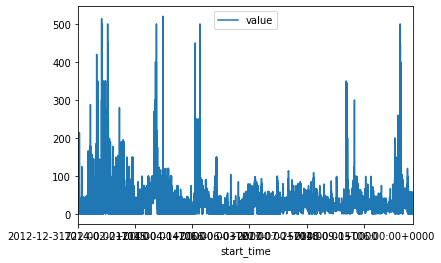

In [18]:
pd.read_csv('/home/aleksei/DOMINOES/FCRN-bidding/data/raw/fcrn_hourly_prices.csv').set_index('start_time').plot()